# 銘柄間の祖間構造（593銘柄、470日）

前回の復習

In [2]:
import pandas as pd
df = pd.read_csv("471-600.csv",index_col=0)
print(df)

              7203     6758    8306     6861     8035     6501   9432    8316  \
Date                                                                            
2022-02-01  2227.0  12770.0   698.6  59410.0  18456.7   5802.0  132.0  4154.0   
2022-02-02  2273.5  13400.0   719.0  63080.0  18833.3   6051.0  131.3  4232.0   
2022-02-03  2293.5  12585.0   719.3  60060.0  18400.0   5852.0  133.5  4174.0   
2022-02-04  2277.5  12600.0   725.7  59990.0  18680.0   5910.0  134.5  4216.0   
2022-02-07  2275.5  12660.0   740.3  58760.0  18423.3   5888.0  134.0  4336.0   
...            ...      ...     ...      ...      ...      ...    ...     ...   
2023-12-25  2537.0  13120.0  1207.0  62040.0  25025.0  10070.0  171.3  6794.0   
2023-12-26  2541.0  13150.0  1203.5  62240.0  25300.0  10035.0  170.8  6774.0   
2023-12-27  2583.0  13340.0  1209.5  62830.0  25620.0  10200.0  171.6  6847.0   
2023-12-28  2556.0  13375.0  1203.5  62630.0  25465.0  10170.0  171.9  6828.0   
2023-12-29  2590.5  13410.0 

銘柄番号が小さい順に並び替える

In [3]:
import pandas as pd

# 列名を整数に変更する
df.columns = df.columns.astype(int)

# 列の値が小さい順に並び替える
df= df.reindex(sorted(df.columns), axis=1)

print(df)


             1332    1333    1377    1414    1417    1605    1662    1719  \
Date                                                                        
2022-02-01  537.0  2438.0  3310.0  5040.0  1881.0  1115.0  2664.0   863.0   
2022-02-02  536.0  2453.0  3310.0  5070.0  1921.0  1138.0  2710.0   870.0   
2022-02-03  539.0  2492.0  3265.0  5040.0  1910.0  1148.0  2712.0   870.0   
2022-02-04  542.0  2499.0  3265.0  5050.0  1902.0  1162.0  2766.0   874.0   
2022-02-07  520.0  2499.0  3275.0  5050.0  1883.0  1174.0  2849.0   873.0   
...           ...     ...     ...     ...     ...     ...     ...     ...   
2023-12-25  764.3  2751.0  3840.0  6165.0  1842.5  1934.0  5190.0  1076.0   
2023-12-26  766.7  2749.5  3860.0  6151.0  1849.0  1945.5  5220.0  1082.0   
2023-12-27  771.0  2767.5  3880.0  6197.0  1864.5  1974.5  5350.0  1098.0   
2023-12-28  759.9  2765.5  3895.0  6204.0  1846.0  1924.5  5320.0  1100.0   
2023-12-29  759.1  2776.0  3915.0  6267.0  1859.0  1904.5  5240.0  1116.0   

## 欠損値の除去と対数収益率の標準化

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):
    # 欠損値を含む列を削除します
    df = df.dropna(axis=1)

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()


# 対数収益率の標準化
scaler = StandardScaler()
log_returns_standardized = pd.DataFrame(scaler.fit_transform(log_returns), index=log_returns.index, columns=log_returns.columns)

# 結果の表示
print(log_returns_standardized)


                1332      1333      1377      1414      1417      1605  \
Date                                                                     
2022-02-02 -0.170711  0.452062 -0.021068  0.449199  1.576186  0.778108   
2022-02-03  0.318062  1.196054 -0.828498 -0.525325 -0.427771  0.307140   
2022-02-04  0.316028  0.195165 -0.021068  0.124679 -0.312153  0.443253   
2022-02-07 -2.768622 -0.021319  0.159319 -0.038063 -0.749263  0.368694   
2022-02-08  2.792938  4.622966  0.961316 -0.038063  0.713663  0.022725   
...              ...       ...       ...       ...       ...       ...   
2023-12-25  0.080619  0.287894 -0.327491  0.148596 -0.443465  0.068969   
2023-12-26  0.157473 -0.063412  0.285355 -0.224722  0.265347  0.193309   
2023-12-27  0.318809  0.482283  0.283772  0.573660  0.626438  0.551211   
2023-12-28 -1.000345 -0.077113  0.206532  0.054627 -0.744181 -1.081186   
2023-12-29 -0.117496  0.271149  0.281040  0.791471  0.526903 -0.467609   

                1662      1719      1

## 対数収益率の相関行列の計算

In [5]:
# 標準化された対数収益率の相関行列の計算
correlation_matrix = log_returns_standardized.corr()

# 結果の表示
print(correlation_matrix)

          1332      1333      1377      1414      1417      1605      1662  \
1332  1.000000  0.611990  0.243001  0.287980  0.399300  0.190533  0.157868   
1333  0.611990  1.000000  0.224445  0.336992  0.409794  0.196011  0.227692   
1377  0.243001  0.224445  1.000000  0.223358  0.201177  0.161843  0.204189   
1414  0.287980  0.336992  0.223358  1.000000  0.298325  0.220579  0.235300   
1417  0.399300  0.409794  0.201177  0.298325  1.000000  0.200034  0.188178   
...        ...       ...       ...       ...       ...       ...       ...   
9962  0.123681  0.104559  0.172635  0.170965  0.303313  0.158939  0.111271   
9983  0.160581  0.163633  0.152530  0.222333  0.201945  0.210967  0.110830   
9984  0.143071  0.115280  0.117211  0.301611  0.169228  0.214710  0.150990   
9987  0.368490  0.365690  0.174289  0.265645  0.294267  0.143241  0.163299   
9989  0.314006  0.247277  0.127601  0.281078  0.323936  0.029971  0.074210   

          1719      1721      1801  ...      9861      9869    

## 相関行列の成分の確率密度

/home/takamori/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


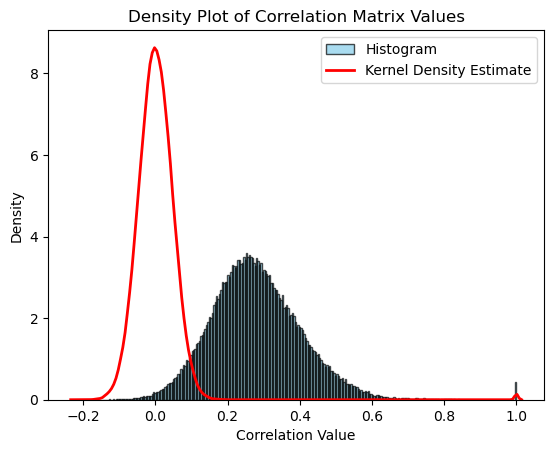

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):
    # 欠損値を含む列を削除します
    df = df.dropna(axis=1)

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()

# 対数収益率の標準化
scaler = StandardScaler()
log_returns_standardized = pd.DataFrame(scaler.fit_transform(log_returns), index=log_returns.index, columns=log_returns.columns)

# 標準化された対数収益率の相関行列の計算
correlation_matrix = log_returns_standardized.corr()

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.values.flatten()

# ヒストグラムのプロット
plt.hist(correlation_values, bins=300, color='skyblue', edgecolor='black', density=True, alpha=0.7, label='Histogram')

# 大きさ (470×593) の標準正規分布に従う行列を生成
matrix = np.random.randn(470, 593)

# 相関行列の計算
correlation_matrix_r = np.corrcoef(matrix, rowvar=False)

# 相関行列の成分を1次元の配列にフラット化
correlation_values_r = correlation_matrix_r.flatten()

# カーネル密度推定を使用して密度関数を推定し、実線で図示
sns.kdeplot(correlation_values_r, color='red', linewidth=2, label='Kernel Density Estimate')

# グラフの装飾
plt.title('Density Plot of Correlation Matrix Values')
plt.xlabel('Correlation Value')
plt.ylabel('Density')
plt.legend()

# グラフの表示
plt.show()


## 相関行列の固有値の確率密度

In [7]:
import numpy as np
from scipy.linalg import eigh

# 対称行列の固有値を計算
eigenvalues, eigenvectors = eigh(correlation_matrix)


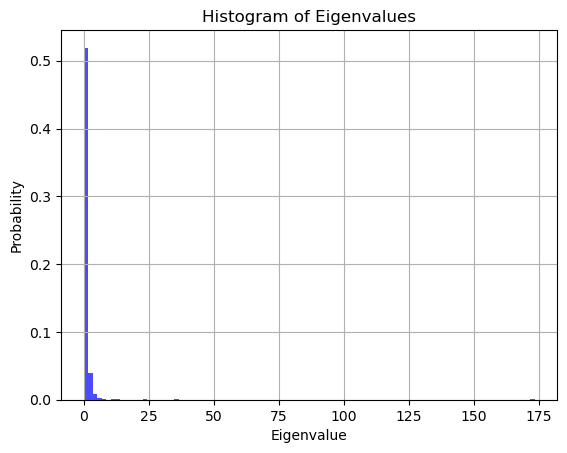

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 固有値のヒストグラムを作成
plt.hist(eigenvalues, bins=100, density=True, alpha=0.7, color='blue')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Histogram of Eigenvalues')
plt.grid(True)
plt.show()


固有値の範囲を0から10に拡大する

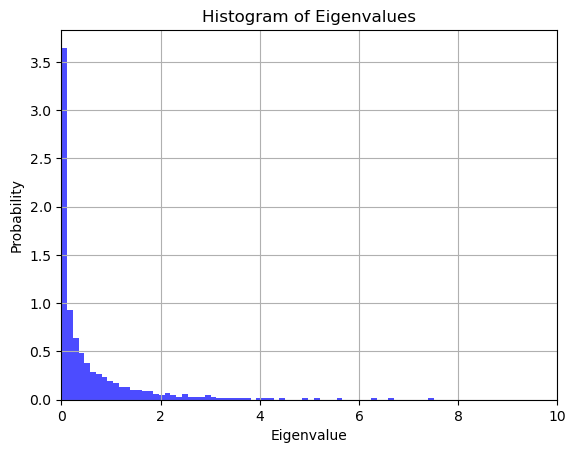

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 固有値のヒストグラムを作成
plt.hist(eigenvalues, bins=1500, density=True, alpha=0.7, color='blue')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Histogram of Eigenvalues')
plt.grid(True)

# x軸の範囲を0から10に拡大
plt.xlim(0, 10)

# グラフの表示
plt.show()


## Marcenko-Pasturの定理
$$
 p(\lambda) = \frac{Q}{2\pi}\frac{\sqrt{(\lambda_+ - \lambda)(\lambda - \lambda_-)}}{\lambda}
$$
ここで、$\sigma^2$は確率変数の分散、Q=T/N
$$
\lambda_+=1+\frac{1}{Q}+2\sqrt{\frac{1}{Q}},
\lambda_-=1+\frac{1}{Q}-2\sqrt{\frac{1}{Q}}
$$

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

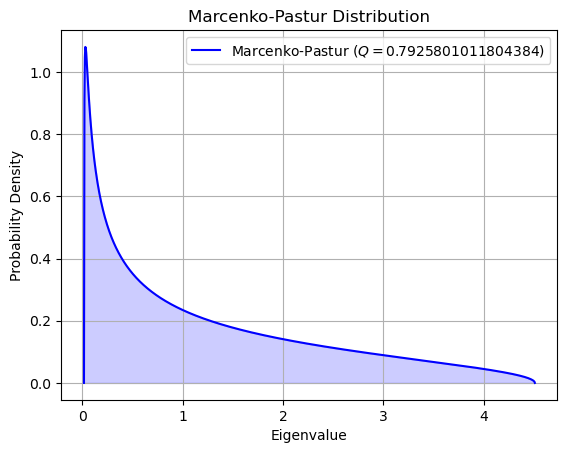

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math

def marcenko_pastur(x, gamma):
    l_min = (1 - np.sqrt(1/(gamma)))**2
    l_max = (1 + np.sqrt(1/(gamma)))**2
    return gamma * np.sqrt((l_max - x) * (x - l_min)) / (2 * np.pi * variance * x)

# パラメータ設定
gamma = 470/593
variance = 1

# 分布の範囲
x_min = (1 - np.sqrt(1/(gamma)))**2
x_max = (1 + np.sqrt(1/(gamma)))**2

display(Math(r"Q={}".format(gamma)))
display(Math(r"$\lambda_-={}$".format(x_min)))
display(Math(r"$\lambda_+={}$".format(x_max)))

# 等高線を描画するためのデータ点生成
x_values = np.linspace(x_min, x_max, 1000)
y_values = marcenko_pastur(x_values, gamma)

# プロット
plt.plot(x_values, y_values, color='blue', label=f'Marcenko-Pastur ($Q={gamma}$)')
plt.fill_between(x_values, y_values, color='blue', alpha=0.2)
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Marcenko-Pastur Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
import numpy as np

# 固有値を小さい順に並び替えた場合のインデックスを取得
sorted_indices = np.argsort(eigenvalues)

# 指定された値よりも大きい固有値を選択し、その合計を計算
threshold_value = 4.5082124237940695
count_greater_than_threshold=np.sum(eigenvalues > threshold_value)
eigenvalues_greater_than_threshold = eigenvalues[eigenvalues > threshold_value]
sum_of_eigenvalues_greater_than_threshold = np.sum(eigenvalues_greater_than_threshold)

print("Number of eigenvalues greater than", threshold_value, ":", count_greater_than_threshold)
print("Eigenvalues greater than", threshold_value, ":", eigenvalues[eigenvalues > threshold_value])
print("Sum of eigenvalues greater than", threshold_value, ":", sum_of_eigenvalues_greater_than_threshold)


Number of eigenvalues greater than 4.5082124237940695 : 11
Eigenvalues greater than 4.5082124237940695 : [  4.93906227   5.14071254   5.62482759   6.29037192   6.70498469
   7.49330668  10.60682815  13.1441391   23.28715875  34.72776529
 173.45772605]
Sum of eigenvalues greater than 4.5082124237940695 : 291.41688301582826


In [12]:
import numpy as np

# 固有値を小さい順に並び替えた場合のインデックスを取得
sorted_indices = np.argsort(eigenvalues)

# 指定された値よりも小さい固有値を選択し、その合計を計算
threshold_value = 0.015191831525079151
count_less_than_threshold = np.sum(eigenvalues < threshold_value)
eigenvalues_less_than_threshold = eigenvalues[eigenvalues < threshold_value]
sum_of_eigenvalues_less_than_threshold = np.sum(eigenvalues_less_than_threshold)

# 指定された値よりも小さい固有値とその個数を表示
print("Number of eigenvalues less than", threshold_value, ":", count_less_than_threshold)
print("Eigenvalues less than", threshold_value, ":", eigenvalues[eigenvalues < threshold_value])
print("Sum of eigenvalues less than", threshold_value, ":", sum_of_eigenvalues_less_than_threshold)


Number of eigenvalues less than 0.015191831525079151 : 143
Eigenvalues less than 0.015191831525079151 : [-8.78057601e-15 -4.41115103e-15 -1.93421572e-15 -7.84578888e-16
 -6.48032729e-16 -5.45066981e-16 -4.87761420e-16 -4.30247564e-16
 -4.12501587e-16 -4.08708668e-16 -3.82360470e-16 -3.64612668e-16
 -3.61273336e-16 -3.57397674e-16 -3.44784679e-16 -3.31976665e-16
 -3.25049224e-16 -3.22723105e-16 -3.21168585e-16 -3.04544526e-16
 -2.97156474e-16 -2.95660993e-16 -2.94001810e-16 -2.69521558e-16
 -2.65356924e-16 -2.49714700e-16 -2.33975431e-16 -2.32579711e-16
 -2.06446921e-16 -2.01155412e-16 -1.99605523e-16 -1.86711193e-16
 -1.76538729e-16 -1.69826954e-16 -1.52530340e-16 -1.36993667e-16
 -1.35061619e-16 -1.25194951e-16 -1.18736005e-16 -9.83599650e-17
 -9.60714863e-17 -9.39129819e-17 -9.28932495e-17 -8.75949971e-17
 -8.40455476e-17 -7.75337633e-17 -7.56192993e-17 -7.18234191e-17
 -4.90094018e-17 -3.15733505e-17  3.06066970e-18  4.40377496e-18
  8.17817571e-18  1.73096619e-17  1.95548335e-17  2

T=470の場合、Q=0.792、$\lambda_+$=4.51、$\lambda_-$=0.015

$\lambda_1$=173.46、$\lambda_{451}$=0.00142

具体的に$\lambda_r$との大小関係をかくと、
$$
\lambda_{593}<…<\lambda_{451}<\lambda_-<…<\lambda_+<\lambda_{11}<…<\lambda_1
$$

ここまでが、前回のお話

## 時系列の強度

$\lambda_r<\lambda_-$と$\lambda_+<\lambda_r$の双方が有意な部分化どうか調べる

今、相関行列$C=\frac{1}{T}GG^T$、$g_{i,t}$を標準化された対数収益率Gの成分とすると

$$
\frac{1}{T}\sum^T_{t=1}\sum^N_{i=1}g^2_{i,t}=TrC=\sum^N_{r=1}\lambda_r=N
$$

が成り立つ

T=470の場合、最大固有値は$\lambda_1$=173.46であったので、全体強度N=593の29.25%を占めている。

ローレンツ曲線の図示

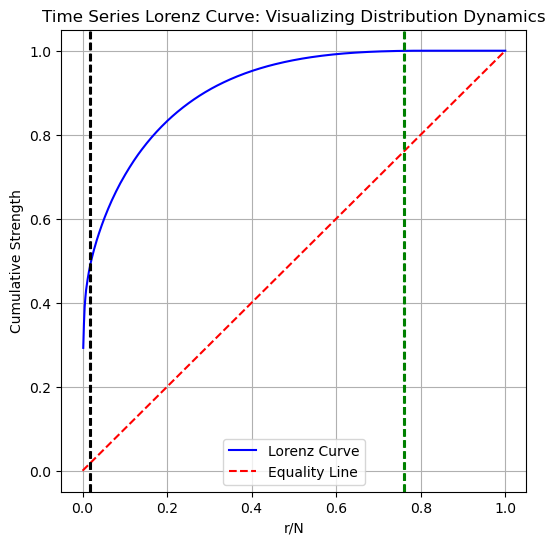

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 時系列データの強度（例：株価の収益率）
time_series_strength = eigenvalues # 仮のデータ、適宜置き換えてください

# データを大きい順にソートして累積和を計算
sorted_strength = np.sort(time_series_strength)[::-1]  # 大きい順にソート
cumulative_sum = np.cumsum(sorted_strength)

# 全体の強度に対する割合（r/N）を計算
N = len(time_series_strength)
r_over_N = np.arange(1, N+1) / N

# Lorenz曲線のプロット
plt.figure(figsize=(6, 6))
plt.plot(r_over_N, cumulative_sum / np.sum(time_series_strength), label='Lorenz Curve', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Equality Line')

# 11/Nと12/Nの間に破線を引く
plt.axvline(x=11/N, color='black', linestyle='--')
plt.axvline(x=12/N, color='black', linestyle='--')

# 451/Nと452/Nの間に破線を引く
plt.axvline(x=451/N, color='green', linestyle='--')
plt.axvline(x=452/N, color='green', linestyle='--')

plt.xlabel('r/N')
plt.ylabel('Cumulative Strength')
plt.title('Time Series Lorenz Curve: Visualizing Distribution Dynamics')
plt.legend()
plt.grid(True)
plt.show()


左側の縦の破線は、$\lambda_+<\lambda_r$とそれ以外を隔てる境界線で、$\lambda_{11}$と$\lambda_{12}$の間に引かれている。

この線の左側では、$\sum_{r=1}^{11}\lambda_r$=291.416となるので、1.85%(11/593)の成分が強度全体の49.14%(291.416/593)を占めている。

右側の縦の破線は、$\lambda_->\lambda_r$とそれ以外を隔てる境界線で、$\lambda_{450}$と$\lambda_{451}$の間に引かれている。

この線の右側では、$\sum_{r=451}^{593}\lambda_r$=0.1872となるので、24.1%(143/593)の成分が強度全体の3.16×$10^{-6}$%(0.1872/593)を占めている。

## 固有ベクトル

### 固有ベクトル成分の確率密度

In [14]:
import numpy as np
from scipy.linalg import eigh

# 対称行列の固有値を計算
eigenvalues, eigenvectors = eigh(correlation_matrix)
eigenvectors=(-1)*eigenvectors
print(eigenvectors)

[[ 0.18247402  0.14864809 -0.21947636 ...  0.04795128  0.05328122
   0.03745283]
 [-0.32595213  0.03644351 -0.00500072 ...  0.0405888   0.06769172
   0.03766513]
 [-0.08912359 -0.08737869 -0.09824452 ...  0.00367233  0.01655969
   0.03047049]
 ...
 [-0.0062374   0.03640747 -0.0940615  ... -0.00743571 -0.05142584
   0.04069655]
 [-0.0743683  -0.01053144 -0.04685195 ...  0.06252898  0.03531183
   0.0344139 ]
 [-0.02045295 -0.05934415  0.03037647 ...  0.0929241   0.01420615
   0.02856131]]


固有値が一番大きい$\lambda_1$の場合

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 固有値を大きい順に並べ替える
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# 1番固有値が大きい固有ベクトルを取得する
top_eigenvalue = sorted_eigenvalues[0]
top_eigenvector = eigenvectors[:, sorted_indices[0]]

print("Top Eigenvalue:", top_eigenvalue)
print("Top Eigenvector:", top_eigenvector)


Top Eigenvalue: 173.4577260503257
Top Eigenvector: [0.03745283 0.03766513 0.03047049 0.0401543  0.0438927  0.02850896
 0.02648374 0.04410435 0.04661321 0.0395405  0.04918197 0.04520095
 0.04891204 0.04501399 0.03301915 0.04661735 0.04766851 0.0441698
 0.03648578 0.04403781 0.04668064 0.05654073 0.0499605  0.04552643
 0.04988443 0.05410833 0.04267673 0.03604549 0.04869627 0.04175055
 0.0352508  0.02633543 0.03713312 0.02745221 0.04040303 0.03527979
 0.04213864 0.02734012 0.02857648 0.0138435  0.03087716 0.01638305
 0.02026002 0.02333759 0.02513388 0.0277475  0.03005535 0.03936524
 0.0394125  0.03942444 0.03073213 0.02449921 0.03453711 0.0386229
 0.03945314 0.03307504 0.04473323 0.03838783 0.04960742 0.03498731
 0.03269372 0.0323973  0.03371994 0.01922275 0.02853369 0.03106523
 0.03961524 0.04508314 0.04092637 0.0393455  0.03708604 0.02672054
 0.03484921 0.03607091 0.02197545 0.02694776 0.02158101 0.03673035
 0.05320372 0.01977273 0.02791259 0.02975295 0.02765174 0.03469813
 0.0229495  0

固有値が一番大きい$\lambda_1$の固有ベクトル成分の確率密度

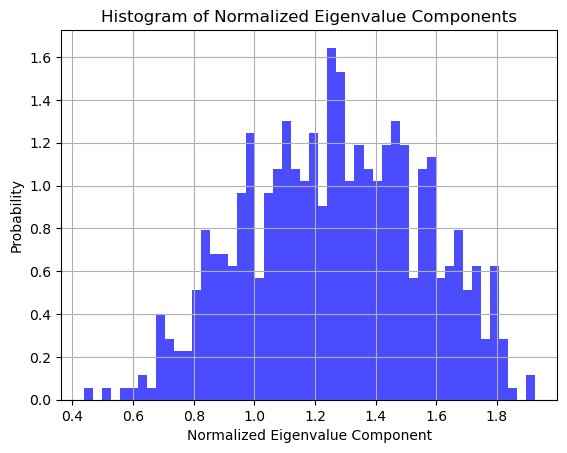

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 固有ベクトルの成分を取得
eigenvector_components = np.atleast_2d(top_eigenvector)  # 2次元の行列に変換

# 固有ベクトルの成分を規格化
eigenvector_norms = np.sum(eigenvector_components**2, axis=1)**0.5  # 各固有ベクトルのノルムを計算
normalized_eigenvectors = eigenvector_components / eigenvector_norms[:, np.newaxis]  # 規格化

# ユーザー定義の規格化条件を適用
normalized_eigenvectors *= np.sqrt(1000)

# 規格化された固有ベクトルの成分のヒストグラムを作成
plt.hist(normalized_eigenvectors.flatten(), bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Normalized Eigenvalue Component')
plt.ylabel('Probability')
plt.title('Histogram of Normalized Eigenvalue Components')
plt.grid(True)
plt.show()


固有値が$\lambda_1$〜$\lambda_{12}$の場合

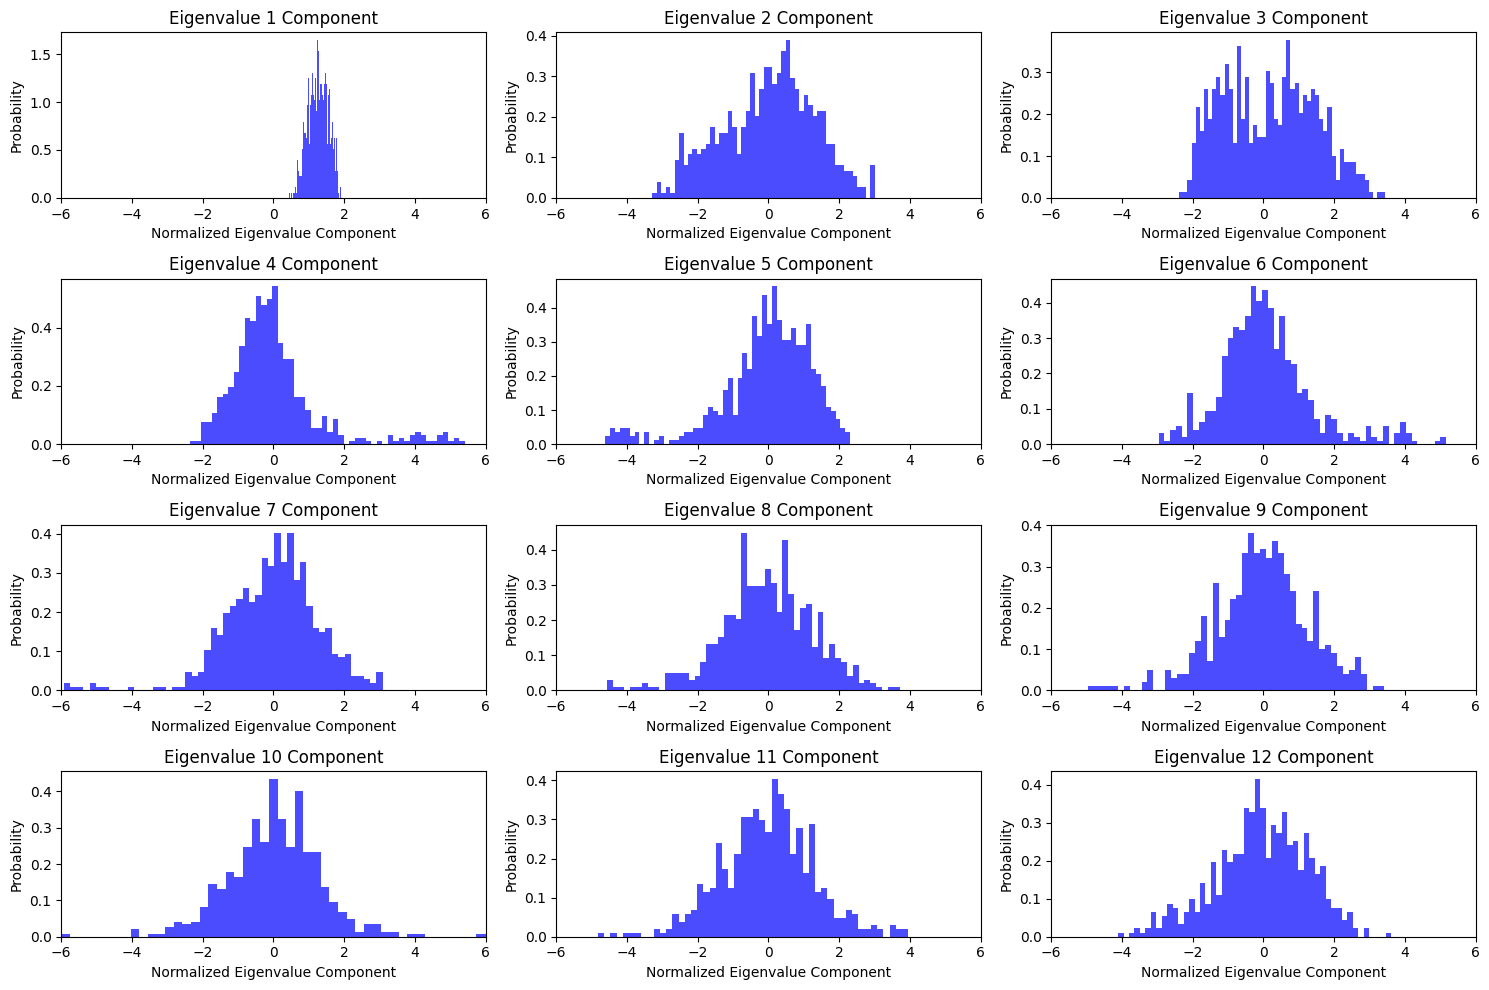

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 上位12番目までの固有値と対応する固有ベクトルを取得する
top_eigenvalues_12 = sorted_eigenvalues[:12]
top_eigenvectors_12 = eigenvectors[:, sorted_indices[:12]]

# 固有ベクトルの成分を規格化
eigenvector_norms = np.linalg.norm(top_eigenvectors_12, axis=0)
normalized_eigenvectors = top_eigenvectors_12 / eigenvector_norms

# ユーザー定義の規格化条件を適用
normalized_eigenvectors *= np.sqrt(1000)

# 規格化された固有ベクトルの成分のヒストグラムを作成
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

for i in range(12):
    row = i // 3
    col = i % 3
    axs[row, col].hist(normalized_eigenvectors[:, i], bins=50, density=True, alpha=0.7, color='blue')
    axs[row, col].set_title(f'Eigenvalue {i+1} Component')
    axs[row, col].set_xlabel('Normalized Eigenvalue Component')
    axs[row, col].set_ylabel('Probability')
    axs[row, col].set_xlim(-6, 6)  # x軸の範囲を設定

plt.tight_layout()
plt.show()


固有値$\lambda$の値が小さいところでは、Porter-Thomas分布(正規分布)とは異なっている。つまり、ランダムではない何らかの構造を持っているとが期待できる。

固有値が$\lambda_{100}$、$\lambda_{200}$、$\lambda_{300}$、$\lambda_{400}$の場合

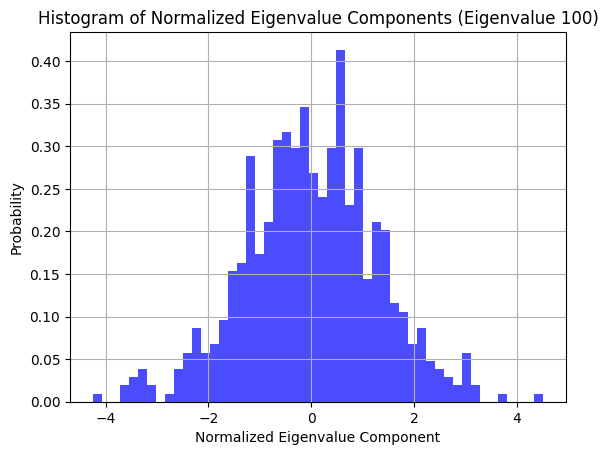

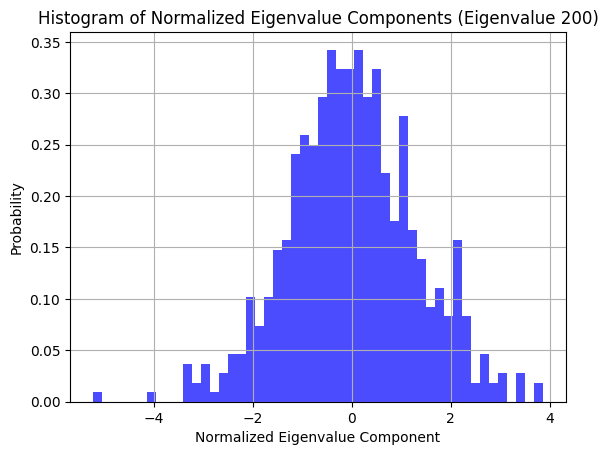

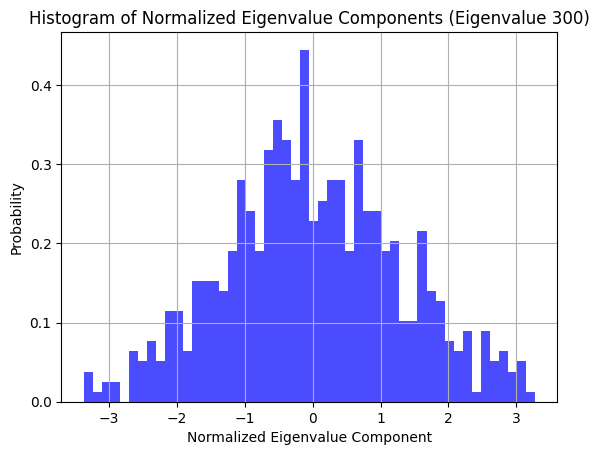

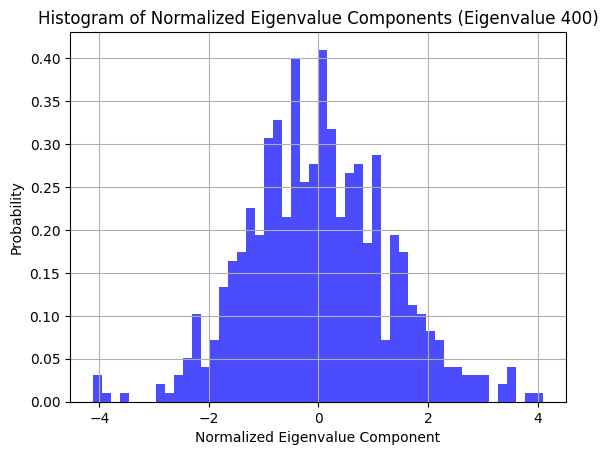

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 固有値を大きい順に並べ替える
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# 対象とする固有値の番号
target_indices = [100, 200, 300, 400]

for idx in target_indices:
    # idx番目に固有値が大きい固有ベクトルを取得する
    eigenvalue_idx = idx - 1  # インデックスは0から始まるため、1を引く
    target_eigenvalue = sorted_eigenvalues[eigenvalue_idx]
    target_eigenvector = eigenvectors[:, sorted_indices[eigenvalue_idx]]

    # 固有ベクトルの成分を取得
    eigenvector_components = np.atleast_2d(target_eigenvector)  # 2次元の行列に変換

    # 固有ベクトルの成分を規格化
    eigenvector_norms = np.sum(eigenvector_components**2, axis=1)**0.5  # 各固有ベクトルのノルムを計算
    normalized_eigenvectors = eigenvector_components / eigenvector_norms[:, np.newaxis]  # 規格化

    # ユーザー定義の規格化条件を適用
    normalized_eigenvectors *= np.sqrt(1000)

    # 規格化された固有ベクトルの成分のヒストグラムを作成
    plt.hist(normalized_eigenvectors.flatten(), bins=50, density=True, alpha=0.7, color='blue')
    plt.xlabel('Normalized Eigenvalue Component')
    plt.ylabel('Probability')
    plt.title(f'Histogram of Normalized Eigenvalue Components (Eigenvalue {idx})')
    plt.grid(True)
    plt.show()


ほぼ正規分布と一致している

### 固有ベクトルの成分の大きさ

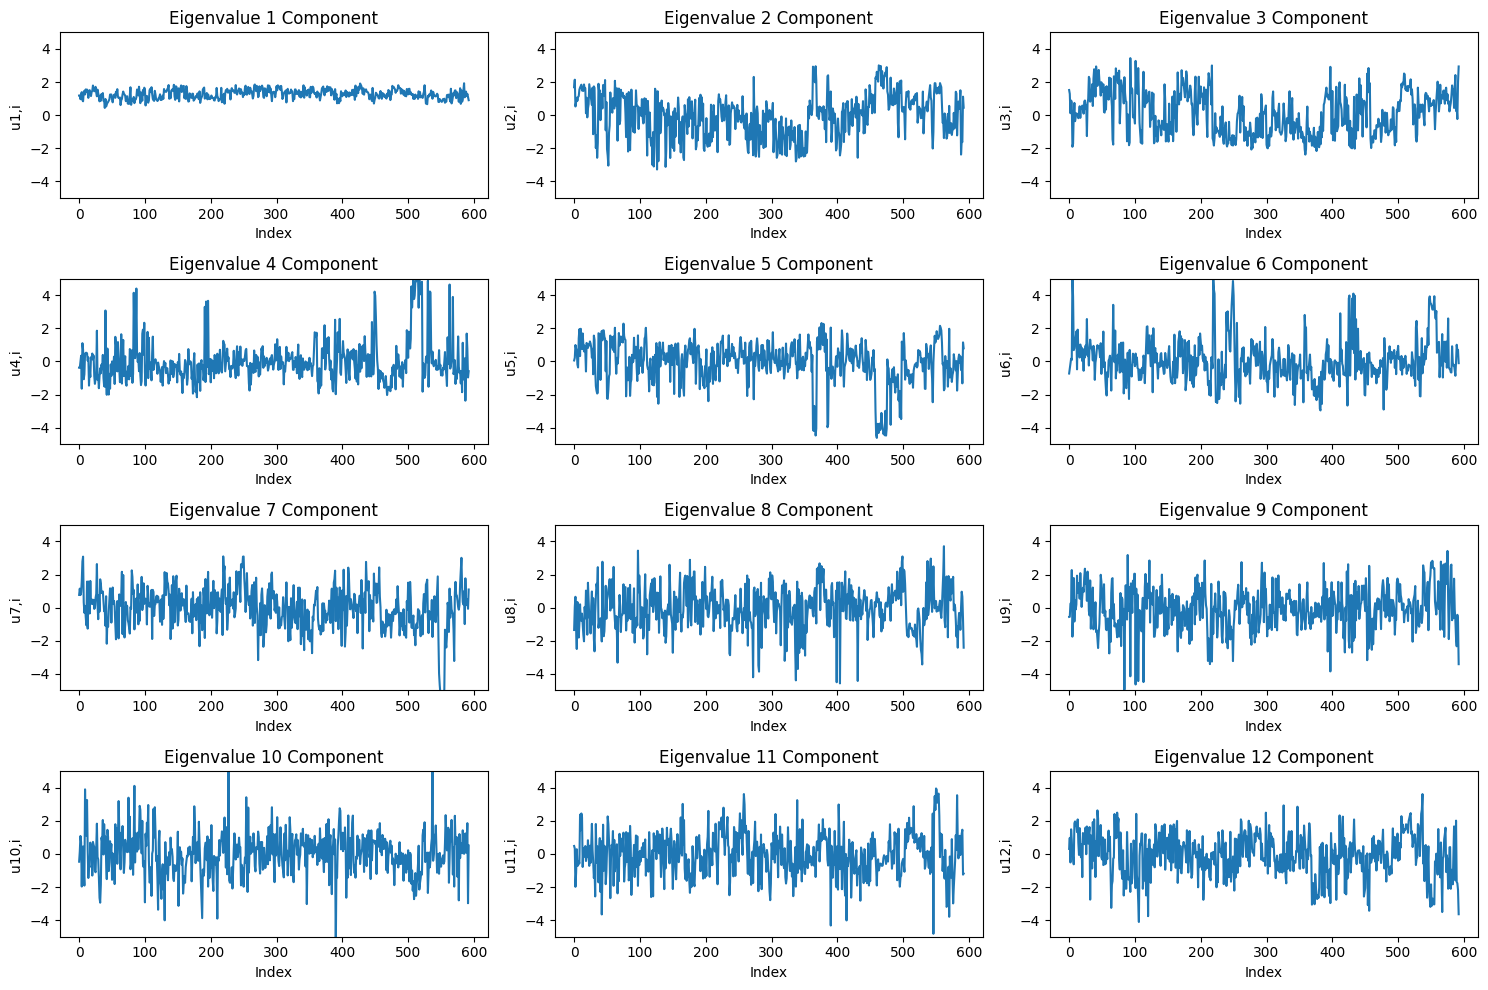

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 上位12番目までの固有値と対応する固有ベクトルを取得する
top_eigenvalues_12 = sorted_eigenvalues[:12]
top_eigenvectors_12 = eigenvectors[:, sorted_indices[:12]]

# 固有ベクトルの成分を規格化
eigenvector_norms = np.linalg.norm(top_eigenvectors_12, axis=0)
normalized_eigenvectors = top_eigenvectors_12 / eigenvector_norms

# ユーザー定義の規格化条件を適用
normalized_eigenvectors *= np.sqrt(1000)

# 折れ線グラフで固有ベクトル成分を表現
fig, axs = plt.subplots(4, 3, figsize=(15, 10))

for i in range(12):
    row = i // 3
    col = i % 3
    axs[row, col].plot(normalized_eigenvectors[:, i])
    axs[row, col].set_title(f'Eigenvalue {i+1} Component')
    axs[row, col].set_xlabel('Index')
    axs[row, col].set_ylabel(f'u{i+1},i ')
    axs[row, col].set_ylim(-5, 5)  # y軸の範囲を-5から5に固定

plt.tight_layout()
plt.show()


### $u_1$の意味（TOPIXとの比較）

対数収益率と$u_1$の内積

In [20]:
import numpy as np

first_row = log_returns.iloc[0]
print(first_row)

# 内積を計算する
inner_product = np.dot(top_eigenvector, first_row)

print(inner_product)


1332   -0.001864
1333    0.006134
1377    0.000000
1414    0.005935
1417    0.021042
          ...   
9962    0.035234
9983   -0.006568
9984    0.026102
9987    0.008759
9989    0.009652
Name: 2022-02-02, Length: 593, dtype: float64
0.5217876952912073


各時刻の対数収益率ベクトル$r_t$と$u_1$の内積を

$$
r_{M,t}=\sum_{i=1}^{N}u_{1,i}r_{i,t}
$$

で定義する

In [21]:
import numpy as np

# 内積を計算する
inner_product = np.dot(top_eigenvector, log_returns.T)
print(inner_product)

[ 0.5217877  -0.12333077  0.14164981 -0.08141236  0.09671911  0.26818178
  0.15164647 -0.29679915 -0.04674013  0.35227086 -0.18697801 -0.0973925
 -0.18646182 -0.35707297 -0.27776258  0.15972771  0.24461757  0.11357887
 -0.51068453  0.26015982 -0.49012814 -0.6832252  -0.52614055 -0.04452842
  0.96567245 -0.34047532  0.19864801  0.24636374  0.19048659  0.55304797
  0.05099349  0.20391377  0.47435611 -0.02719755  0.065538   -0.10054929
  0.15013485 -0.29431454 -0.31603034 -0.00700383  0.11879209 -0.03730386
 -0.40412506 -0.40778083  0.04482295 -0.08098899 -0.30555931  0.32755982
  0.21584125 -0.17680652 -0.21126197  0.25163973  0.21662396  0.19123514
 -0.259237   -0.35936712  0.08227962 -0.25668207  0.59715971  0.00882246
  0.22657833 -0.40235347 -0.08305675 -0.14814634 -0.24997434  0.46132878
 -0.16893443  0.03670032  0.12385562 -0.19215123  0.17344317  0.19380201
 -0.25817865 -0.04878507  0.01911413  0.14909348  0.42384851 -0.16304086
  0.42733315 -0.11896829  0.07182723  0.08869386  0.

標準化する

In [22]:
import numpy as np

# データの平均を計算
mean = np.mean(inner_product)

# データの標準偏差を計算
std = np.std(inner_product)

# データを標準化する
standardized_data = (inner_product - mean) / std

print("標準化後のデータ:")
print(standardized_data)

標準化後のデータ:
[ 2.24321545e+00 -5.94349638e-01  5.71172168e-01 -4.09970795e-01
  3.73543685e-01  1.12772532e+00  6.15142629e-01 -1.35735341e+00
 -2.57464358e-01  1.49759260e+00 -8.74303182e-01 -4.80259692e-01
 -8.72032693e-01 -1.62246891e+00 -1.27362074e+00  6.50688133e-01
  1.02407769e+00  4.47701633e-01 -2.29813210e+00  1.09244057e+00
 -2.20771446e+00 -3.05705533e+00 -2.36611570e+00 -2.47736120e-01
  4.19565049e+00 -1.54946383e+00  8.21879778e-01  1.03175826e+00
  7.85981627e-01  2.38071431e+00  1.72418725e-01  8.45041285e-01
  2.03458676e+00 -1.71505966e-01  2.36392999e-01 -4.94144927e-01
  6.08493769e-01 -1.34642484e+00 -1.44194216e+00 -8.26835362e-02
  4.70632084e-01 -2.15958737e-01 -1.82942836e+00 -1.84550835e+00
  1.45277508e-01 -4.08108578e-01 -1.39588515e+00  1.38890067e+00
  8.97504519e-01 -8.29563705e-01 -9.81116627e-01  1.05496481e+00
  9.00947322e-01  7.89274133e-01 -1.19213566e+00 -1.63255975e+00
  3.10031321e-01 -1.18089772e+00  2.57474062e+00 -1.30713128e-02
  9.44731793e-0

TOPIXの対数収益率の標準化

In [23]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tpx.csv",index_col=0)
print(df)

              Close
Date               
2022-02-01  1896.06
2022-02-02  1936.56
2022-02-03  1919.92
2022-02-04  1930.56
2022-02-07  1925.99
...             ...
2023-12-25  2337.40
2023-12-26  2338.86
2023-12-27  2365.40
2023-12-28  2362.02
2023-12-29  2366.39

[471 rows x 1 columns]


In [24]:
import numpy as np

# 対数収益率を計算する
log_returns_t= np.diff(np.log(df), axis=0)

# データの平均を計算
mean = np.mean(log_returns_t)

# データの標準偏差を計算
std = np.std(log_returns_t)

# データを標準化する
standardized_data_t= (log_returns_t - mean) / std


$u_1$の対数収益率とTOPIXの対数収益率の散布図

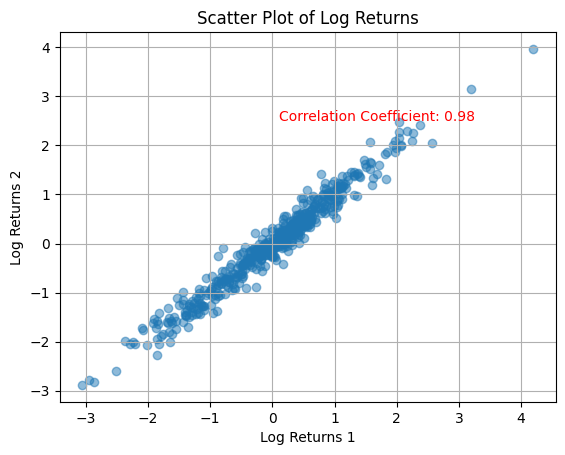

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.DataFrame(standardized_data)
df2 = pd.DataFrame(standardized_data_t)

# DataFrameをインデックスで統合
merged_df = pd.concat([df1, df2], axis=1)

# 散布図を作成
plt.scatter(merged_df.iloc[:, 0], merged_df.iloc[:, 1], alpha=0.5)
plt.xlabel('Log Returns 1')
plt.ylabel('Log Returns 2')
plt.title('Scatter Plot of Log Returns')

# 相関係数を計算
corr_coefficient = np.corrcoef(merged_df.iloc[:, 0], merged_df.iloc[:, 1],)[0, 1]

# 相関係数を表示
plt.text(0.1, 2.5, f'Correlation Coefficient: {corr_coefficient:.2f}', fontsize=10, color='red')

plt.grid(True)
plt.grid(True)
plt.show()


相関係数が0.98と高いので、$u_1$とTOPIXは強い相関があることがわかる。この結果、$u_1$は市場全体を表すと解釈できる。

### $u_1$以外の固有ベクトル

ランダムではない構造とは何かを調べる

固有ベクトルの成分で大きい方から10銘柄と、小さい方から10銘柄を選び出す。

In [26]:
import numpy as np

# 相関行列の銘柄番号
stock_numbers = log_returns_standardized.columns

# 固有ベクトルを転置し、行ごとに対応する固有値を紐づける
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

# 固有ベクトルを固有値の大きい順に並び替える
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# 大きい方から12銘柄と小さい方から12銘柄を選ぶ
top_10_components = [pair[1] for pair in eigen_pairs[:12]]
bottom_10_components = [pair[1] for pair in eigen_pairs[-12:]]

# 銘柄番号を最大10まで表示
def print_stock_numbers(components):
    for i, component in enumerate(components):
        stock_indices = np.argsort(component)[::-1]  # 固有ベクトルの成分の大きさの順にソートしたインデックス
        selected_stock_numbers = [stock_numbers[idx] for idx in stock_indices]  # 対応する銘柄番号を取得
        print(f"Component {i+1}: {selected_stock_numbers[:10]}")

print("Top 10 Components:")
print_stock_numbers(top_10_components)

print("\nBottom 10 Components:")
print_stock_numbers(bottom_10_components)


Top 10 Components:
Component 1: [9934, 8012, 6113, 4118, 8015, 4045, 5393, 8591, 9072, 6473]
Component 2: [8331, 8354, 7186, 7167, 8334, 8418, 8341, 8359, 8308, 8410]
Component 3: [3141, 3349, 4967, 2229, 9989, 7649, 8279, 3391, 2809, 2206]
Component 4: [9021, 9006, 9024, 9041, 9022, 9142, 9020, 9048, 9009, 9045]
Component 5: [7261, 2875, 7270, 9513, 7211, 9531, 7459, 2602, 3405, 1802]
Component 6: [1605, 5019, 5713, 5020, 5711, 8053, 5021, 8002, 5714, 8058]
Component 7: [5019, 5714, 1662, 5713, 9832, 1605, 8078, 1963, 5703, 5706]
Component 8: [9613, 3231, 8802, 9433, 4528, 9364, 2267, 8801, 7211, 4151]
Component 9: [9759, 3107, 3774, 4812, 9506, 9682, 6013, 9504, 6417, 7419]
Component 10: [5192, 9364, 3088, 1801, 5803, 2875, 1808, 2587, 3391, 3132]
Component 11: [9504, 9505, 9508, 5938, 9507, 9843, 9502, 6869, 9506, 4452]
Component 12: [9364, 6754, 6954, 9303, 2267, 2811, 6465, 9044, 3360, 9301]

Bottom 10 Components:
Component 1: [2587, 8584, 8801, 3288, 6967, 6326, 1833, 9001, 5411,

例えば、$u_{4,+}$は9000番台が並んでいることがわかる。（9000番台は陸運業）

$u_{11,+}$は9500番台（電気・ガス業）や$u_{7,-}$など


## 固有ベクトルの寄与率

固有ベクトルに寄与している成分の数を解析する。寄与率の定義を
$$
\Upsilon=\frac{3}{I_r}\qquad(r=1,2,...,N)
$$
とする

ここで、$I_r$は、寄与率の逆数(Inverse Participation Ratio)と呼ばれ、
$$
I_r=\frac{1}{N^2}\sum^N_{i=i}u^4_{r,i}
$$
と定義される

具体的に、固有ベクトルの寄与率を計算すると以下のようになる

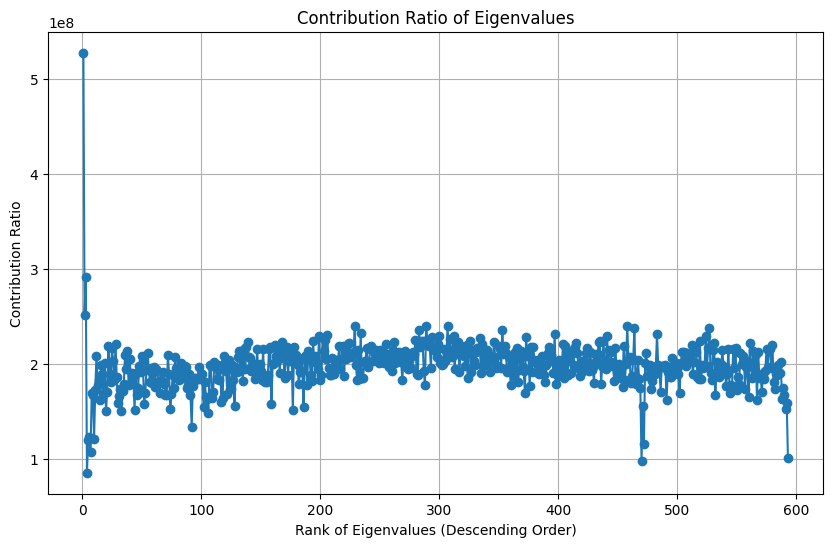

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 固有値を降順でソート
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 固有ベクトルを規格化
normalized_eigenvectors = sorted_eigenvectors / np.linalg.norm(sorted_eigenvectors, axis=0)

# 寄与率を計算
N = len(sorted_eigenvalues)
inverse_participation_ratio = np.zeros(N)
for r in range(N):
    u_r = normalized_eigenvectors[:, r]
    I_r = np.mean(u_r**4)/N
    inverse_participation_ratio[r] = 3 / I_r

# プロット
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, N + 1), inverse_participation_ratio, marker='o', linestyle='-')
plt.title('Contribution Ratio of Eigenvalues')
plt.xlabel('Rank of Eigenvalues (Descending Order)')
plt.ylabel('Contribution Ratio')
plt.grid(True)
plt.show()


## 有意成分とグループ構造

有意成分とノイズを分ける順位を$N_g$と書くことにする。


固有ベクトルから構成される基底の変換行列Pとその逆行列$P^{-1}$を用いると、相関行列は
$$
P^{-1}CP=diag\{\lambda_1,...,\lambda_{N_g},\lambda_{N_{g+1}},...,\lambda_N\}
$$
となる

In [28]:
import numpy as np

def decompose_diagonal_matrix(eigenvalues):
    n = len(eigenvalues)
    # 分解する3つの対角行列を初期化
    diag1 = np.zeros(n)
    diag2 = np.zeros(n)
    diag3 = np.zeros(n)

    # 条件に基づいて固有値を各対角行列に割り当て
    if n > 0:
        diag1[0] = eigenvalues[0]  # 最初の固有値はdiag1に
    if n > 1:
        diag2[1:min(n, 12)] = eigenvalues[1:min(n, 12)]  # 次の11個の固有値はdiag2に
    if n > 12:
        diag3[12:n] = eigenvalues[12:n]  # 残りの固有値はdiag3に

    # numpyのdiag関数を使って対角行列を作成
    D1 = np.diag(diag1)
    D2 = np.diag(diag2)
    D3 = np.diag(diag3)

    return D1, D2, D3

def sort_and_decompose(eigenvalues):
    # 固有値を降順にソート
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]
    # ソートされた固有値を使って行列を分解
    return decompose_diagonal_matrix(sorted_eigenvalues)

# 行列を分解
D1, D2, D3 = sort_and_decompose(eigenvalues)

print("D1:")
print(D1)
print("D2:")
print(D2)
print("D3:")
print(D3)


D1:
[[173.45772605   0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]
D2:
[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.         34.72776529  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         23.28715875 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
D3:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.0000000

In [29]:
import numpy as np

def apply_similarity_transformation(D, V):
    # Vの逆行列を計算
    V_inv = np.linalg.inv(V)
    # V * D * V_invを計算して、類似行列を返す
    return V.dot(D).dot(V_inv)

V = eigenvectors

# 先程分解した行列D1, D2, D3
# ここでは先に定義した関数sort_and_decomposeを使ってD1, D2, D3を再度計算
D1, D2, D3 = sort_and_decompose(eigenvalues)

# 各行列に対して類似変換を適用
D1_transformed = apply_similarity_transformation(D1, V)
D2_transformed = apply_similarity_transformation(D2, V)
D3_transformed = apply_similarity_transformation(D3, V)

print("Transformed D1:")
print(D1_transformed)
print("Transformed D2:")
print(D2_transformed)
print("Transformed D3:")
print(D3_transformed)


Transformed D1:
[[ 6.69673586e-01 -2.95222807e+00 -1.44603058e+00 ... -1.52958978e-01
   3.16581887e-02  8.45010685e-02]
 [-2.95222807e+00  1.30147743e+01  6.37476551e+00 ...  6.74313276e-01
  -1.39563804e-01 -3.72519436e-01]
 [-1.44603058e+00  6.37476551e+00  3.12242336e+00 ...  3.30285329e-01
  -6.83597352e-02 -1.82463713e-01]
 ...
 [-1.52958978e-01  6.74313276e-01  3.30285329e-01 ...  3.49370940e-02
  -7.23099177e-03 -1.93007420e-02]
 [ 3.16581887e-02 -1.39563804e-01 -6.83597352e-02 ... -7.23099177e-03
   1.49661108e-03  3.99470850e-03]
 [ 8.45010685e-02 -3.72519436e-01 -1.82463713e-01 ... -1.93007420e-02
   3.99470850e-03  1.06625537e-02]]
Transformed D2:
[[ 2.53438151  0.20826462 -0.27767722 ...  0.26561601 -0.28056491
  -0.16195506]
 [ 0.20826462  0.4889713  -0.65416405 ...  0.10525615  0.1259095
  -0.07762914]
 [-0.27767722 -0.65416405  1.01039993 ... -0.11027908 -0.12201569
   0.157969  ]
 ...
 [ 0.26561601  0.10525615 -0.11027908 ...  0.12302524  0.0036124
  -0.02906778]
 [-0.

擬相関行列の非対角成分の確率密度

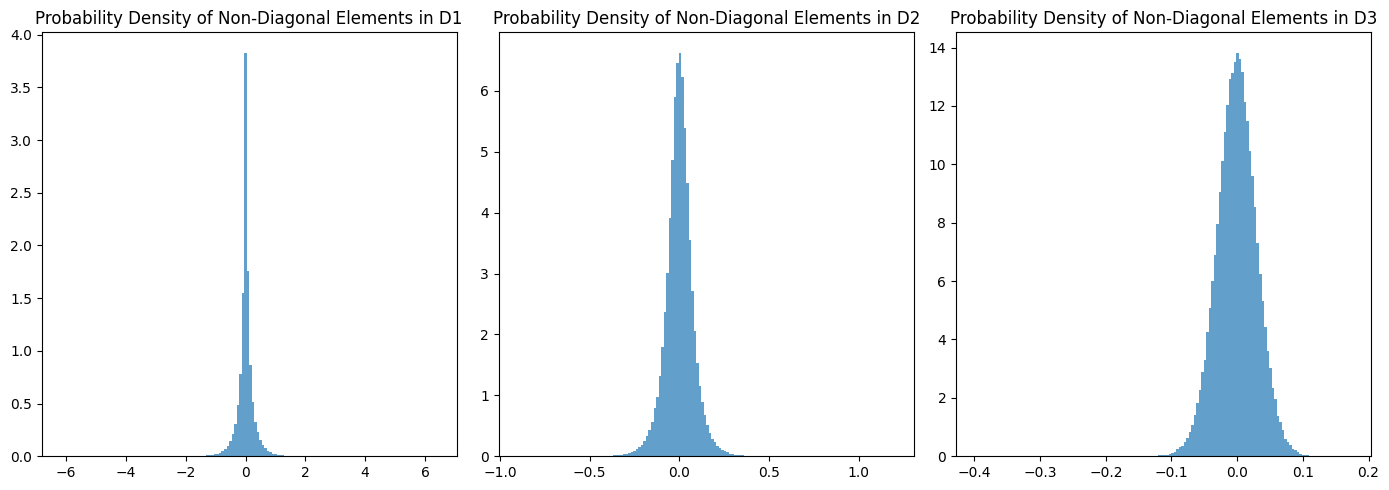

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def extract_non_diagonal_elements(matrix):
    # 対角成分を除いた非対角成分を抽出
    non_diag = matrix.flatten()
    # 対角成分のインデックスを計算（0, 1, ..., n-1 for nxn matrix）
    diag_indices = np.arange(matrix.shape[0])
    # 対角成分を除外
    non_diag = np.delete(non_diag, diag_indices * (matrix.shape[1] + 1))
    return non_diag

# 各行列の非対角成分を抽出
non_diag_elements_D1 = extract_non_diagonal_elements(D1_transformed)
non_diag_elements_D2 = extract_non_diagonal_elements(D2_transformed)
non_diag_elements_D3 = extract_non_diagonal_elements(D3_transformed)

# 各非対角成分の確率密度をヒストグラムでプロット
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.hist(non_diag_elements_D1, bins=150, alpha=0.7, density=True)
plt.title('Probability Density of Non-Diagonal Elements in D1')

plt.subplot(1, 3, 2)
plt.hist(non_diag_elements_D2, bins=150, alpha=0.7, density=True)
plt.title('Probability Density of Non-Diagonal Elements in D2')

plt.subplot(1, 3, 3)
plt.hist(non_diag_elements_D3, bins=150, alpha=0.7, density=True)
plt.title('Probability Density of Non-Diagonal Elements in D3')

plt.tight_layout()
plt.show()


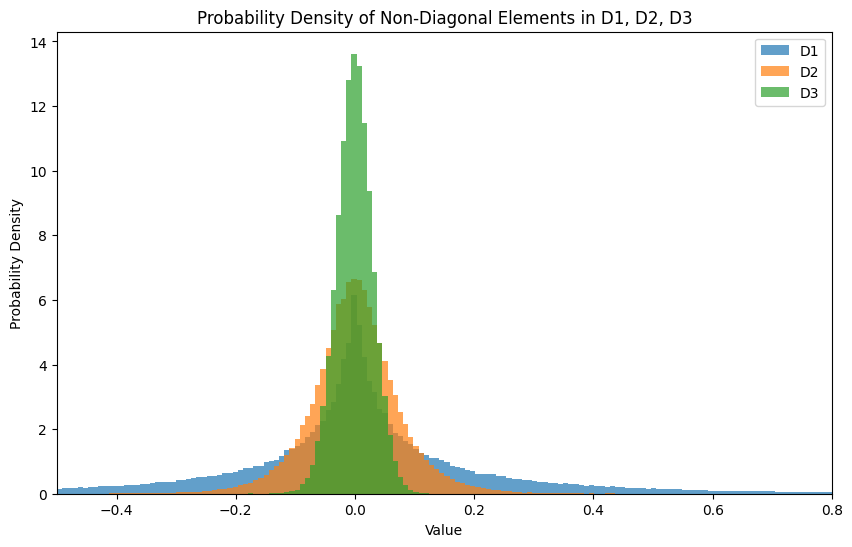

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def extract_non_diagonal_elements(matrix):
    # 対角成分を除いた非対角成分を抽出
    non_diag = matrix.flatten()
    # 対角成分のインデックスを計算（0, 1, ..., n-1 for nxn matrix）
    diag_indices = np.arange(matrix.shape[0])
    # 対角成分を除外
    non_diag = np.delete(non_diag, diag_indices * (matrix.shape[1] + 1))
    return non_diag

# 各行列の非対角成分を抽出
non_diag_elements_D1 = extract_non_diagonal_elements(D1_transformed)
non_diag_elements_D2 = extract_non_diagonal_elements(D2_transformed)
non_diag_elements_D3 = extract_non_diagonal_elements(D3_transformed)

# ヒストグラムを1つの図にまとめてプロット
plt.figure(figsize=(10, 6))
plt.hist(non_diag_elements_D1, bins=150, alpha=0.7, density=True, label='D1', range=(-0.5, 0.8))
plt.hist(non_diag_elements_D2, bins=150, alpha=0.7, density=True, label='D2', range=(-0.5, 0.8))
plt.hist(non_diag_elements_D3, bins=150, alpha=0.7, density=True, label='D3', range=(-0.5, 0.8))

plt.title('Probability Density of Non-Diagonal Elements in D1, D2, D3')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.xlim(-0.5, 0.8)
plt.show()


市場を表す相関行列が、教科書のように図示できていない。これは、ここ数年の日本の株価が大きくは増加していない(増加、減少を繰り返している)ためと予想される。
